<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="pexels-artem-beliaikin-1078958.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                  <b> Forecasting Personalized E-commerce Products for Customers   </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="20%">
            <img src="pexels-freestocksorg-291762.jpg">
        </td>
        <td>
            <div align="center", style="font-size:250%">
                <font color="#21618C">
                    <b>Problem Statement<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='problem'></a>


 Online store offers shoppers an extensive selection of products to browse through. But with too many choices, customers might not quickly find what interests them or what they are looking for, and ultimately, they might not make a purchase. To enhance the shopping experience, product recommendations are key. More importantly, helping customers make the right choices also has a positive implications for sustainability, as it reduces returns, and thereby minimizes emissions from transportation. ​

The **GOAL**  is to predict which articles that every customer will puchase in the future by analysing the past transaction data.


## Table of Contents

1. **[Problem Statement](#problem)**

2. **[Importing the Libraries](#import_lib)**

3. **[Reading the datasets](#read_data)**

4. **[Data Preprocessing](#data_prep)**

    - 4.1 - [Articles Dataset](#art_data)
        - 4.1.1 - [Data Dictionary of Articles Dataset](#dict_art)
        - 4.1.2 - [Exploratory Data Analysis](#eda_art)
            - 4.1.2.1 - [Data Dimensions, Data Types, Summary Statistics](#dd_art)
              
    - 4.2 - [Customers Dataset](#tag_data)
        - 4.2.1 - [Data Dictionary of Customers Dataset](#dict_tag)
        - 4.2.2 - [Exploratory Data Analysis](#eda_tag)
             - 4.2.2.1 - [Data Dimensions, Data Types, Summary Statistics](#dd_tag)
              
    - 4.3 - [Transaction Dataset](#ua_data)
        - 4.3.1 - [Data Dictionary of Transaction Dataset](#dict_ua)
        - 4.3.2 - [Exploratory Data Analysis](#eda_ua)
             - 4.3.2.1 - [Data Dimensions, Data Types, Summary Statistics](#dd_ua)
    

5. **[Baseline Recommendation](#rec)**
    


<table align="left">
    <tr>
        <td width="15%">
            <img src="pexels-andrea-piacquadio-994234.jpg">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Importing the Libraries<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='import_lib'></a>

In [70]:
pip install pandasql

In [139]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf
from tqdm import tqdm
import datetime

import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from pathlib import Path
from collections import Counter
from itertools import chain, combinations
import random
import pprint
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<table align="left">
    <tr>
        <td width="20%">
            <img src="pexels-marlene-leppänen-1092307.jpg">
        </td>
        <td>
            <div align="center", style="font-size:300%">
                <font color="#21618C">
                    <b>Data Preprocessing<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='data_prep'></a>

Data Overview
- images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the - article_id; note, not all article_id values have a corresponding image.
- articles.csv - detailed metadata for each article_id available for purchase
- customers.csv - metadata for each customer_id in dataset
sample_submission.csv - a sample submission file in the correct format
- transactions.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. 

Aim is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.


<table align="left">
    <tr>
        <td width="15%">
            <img src="pexels-marlene-leppänen-1183266.jpg">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Reading the datasets<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='read_data'></a>

## Articles Dataset <a id='art_data'></a>

In [73]:
articles = pd.read_csv('/content/drive/MyDrive/Project_Data/articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."



<table align="left">
    <tr>
        <td width="15%">
            <img src="pexels-andrea-piacquadio-972995.jpg">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='eda_art'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dimensions, Data Types, Summary Statistics  for Articles Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dd_art'></a>



In [74]:
articles.shape

(105542, 25)

##### The dataframe articles has 105542 rows


In [75]:
articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [76]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [77]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [78]:
articles.describe(include = np.object)

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_code,index_name,index_group_name,section_name,garment_group_name,detail_desc
count,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105126
unique,45875,131,19,30,50,8,20,250,10,10,5,56,21,43404
top,Dragonfly dress,Trousers,Garment Upper body,Solid,Black,Dark,Black,Jersey,A,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,T-shirt in printed cotton jersey.
freq,98,11169,42741,49747,22670,42706,22585,4604,26001,26001,39737,7295,21445,159


The "articles" dataframe has 25 columns and more than 100k rows.
For our our analysis we will just select the following columns:

article_id
prod_name
product_type_name
product_group_name
colour_group_name
index_name

In [79]:
df_articles = sqldf("""SELECT article_id, prod_name, product_type_name, product_group_name, colour_group_name, index_name
            FROM articles
            """)

In [80]:
df_articles.head()

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Black,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,White,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Off White,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Black,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,White,Lingeries/Tights


In [81]:
num_articles = len(articles)
num_unique_id = len(articles['article_id'].unique())
print(f'We have {num_articles} rows in the dataframe and {num_unique_id} unique article IDs') 

We have 105542 rows in the df and 105542 unique article IDs


In [82]:
num_prod_codes = len(articles['product_code'].unique())
print(f'Each article has a product_code, some articles have the same product_code with a total of {num_prod_codes} unique values')

Each article has a product_code, some articles have the same product_code with a total of 47224 unique values


In [83]:
num_prod_name = len(articles['prod_name'].unique())
print(f'Each article also has a prod_name, with a total of {num_prod_name} unique values')

Each article also has a prod_name, with a total of 45875 unique values


Interestingly there are a different number of unique product_code values and prod_name values meaning there isn't a 1 to 1 mapping between them.

In [84]:
def plot_bar_chart(df, feature, x_lim):
    feature_count  = df[feature].value_counts()
    feature_count = feature_count[:x_lim,]
    plt.figure(figsize=(30,10))
    sns.barplot(feature_count.index, feature_count.values, alpha=0.7)
    sns.set(font_scale = 2)
    plt.title(f'Frequency of top {x_lim} {feature}', fontsize=30)
    plt.ylabel('Count', fontsize=30)
    plt.xlabel(feature.replace('_', ' '), fontsize=50)
    sns.set(font_scale=1.2)
    plt.show()

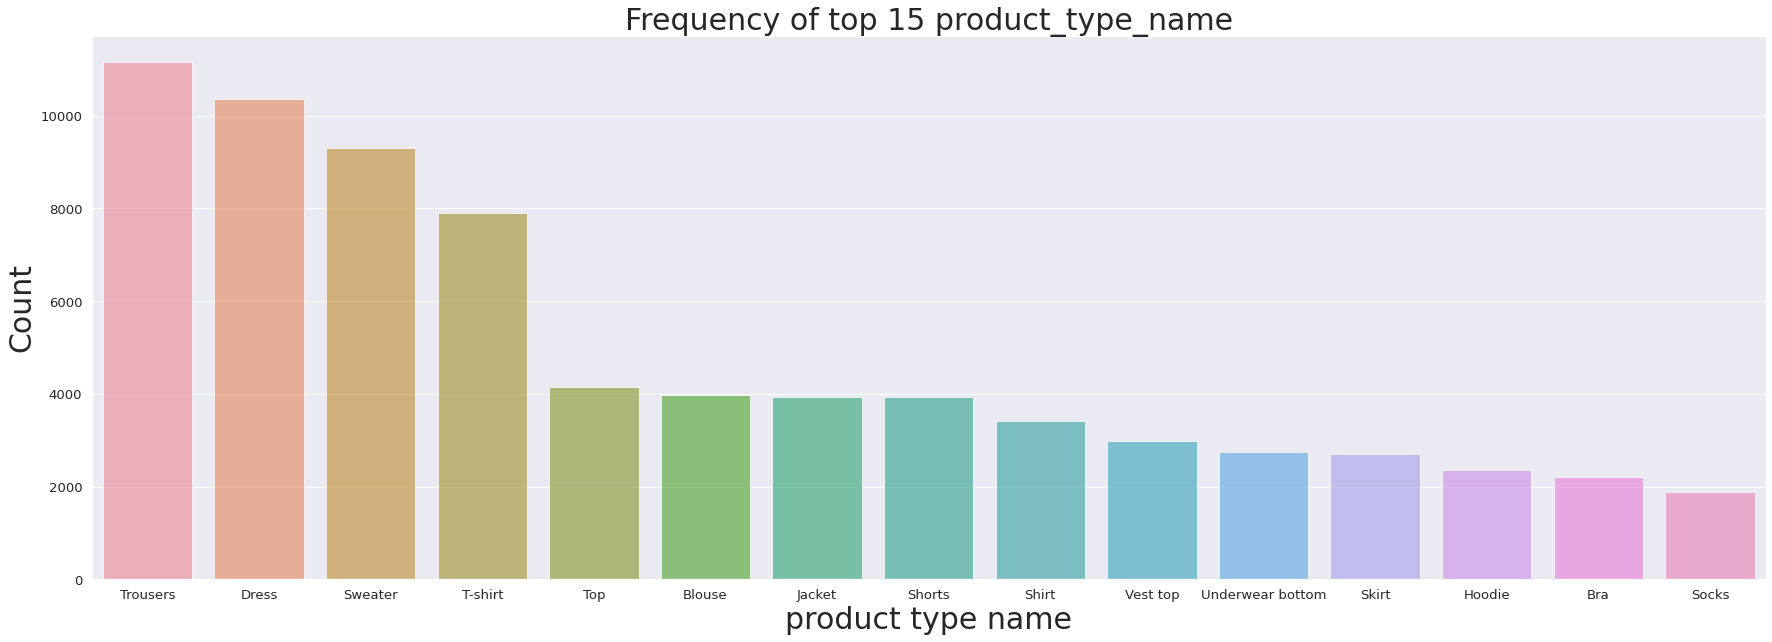

In [85]:
plot_bar_chart(articles, 'product_type_name', 15)

In [86]:
num_prod_group = len(articles['product_group_name'].unique())
print(f'We have {num_prod_group} unique product_group_names values')

We have 19 unique product_group_names values


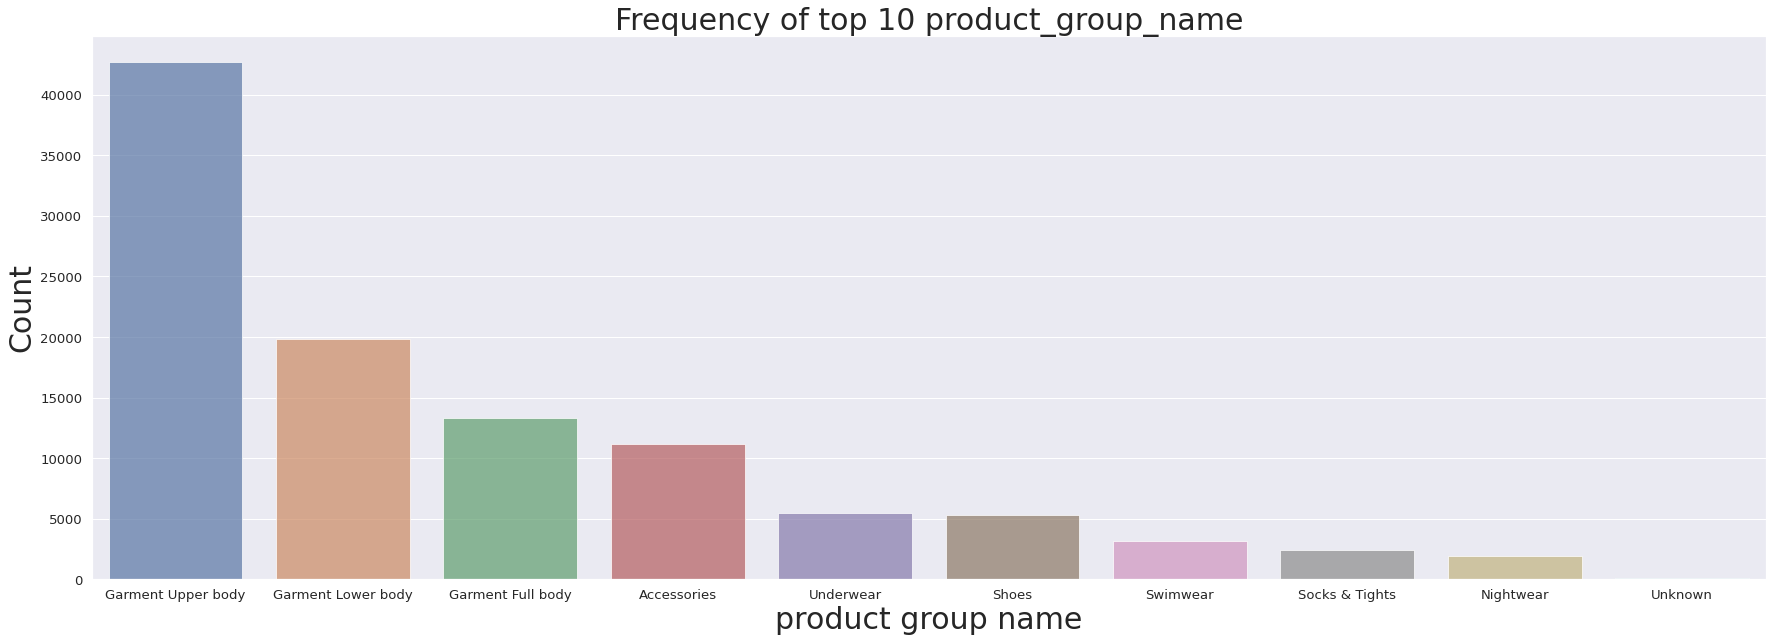

In [87]:
plot_bar_chart(articles, 'product_group_name', 10)

We have six columns related to colour:

- `colour_group_code` 
- `colour_group_name`
- `perceived_colour_value_id`
- `perceived_colour_value_name`
- `perceived_colour_master_id`
- `perceived_colour_master_name`

For the sake of brevity we only plot `perceived_colour_master_name`

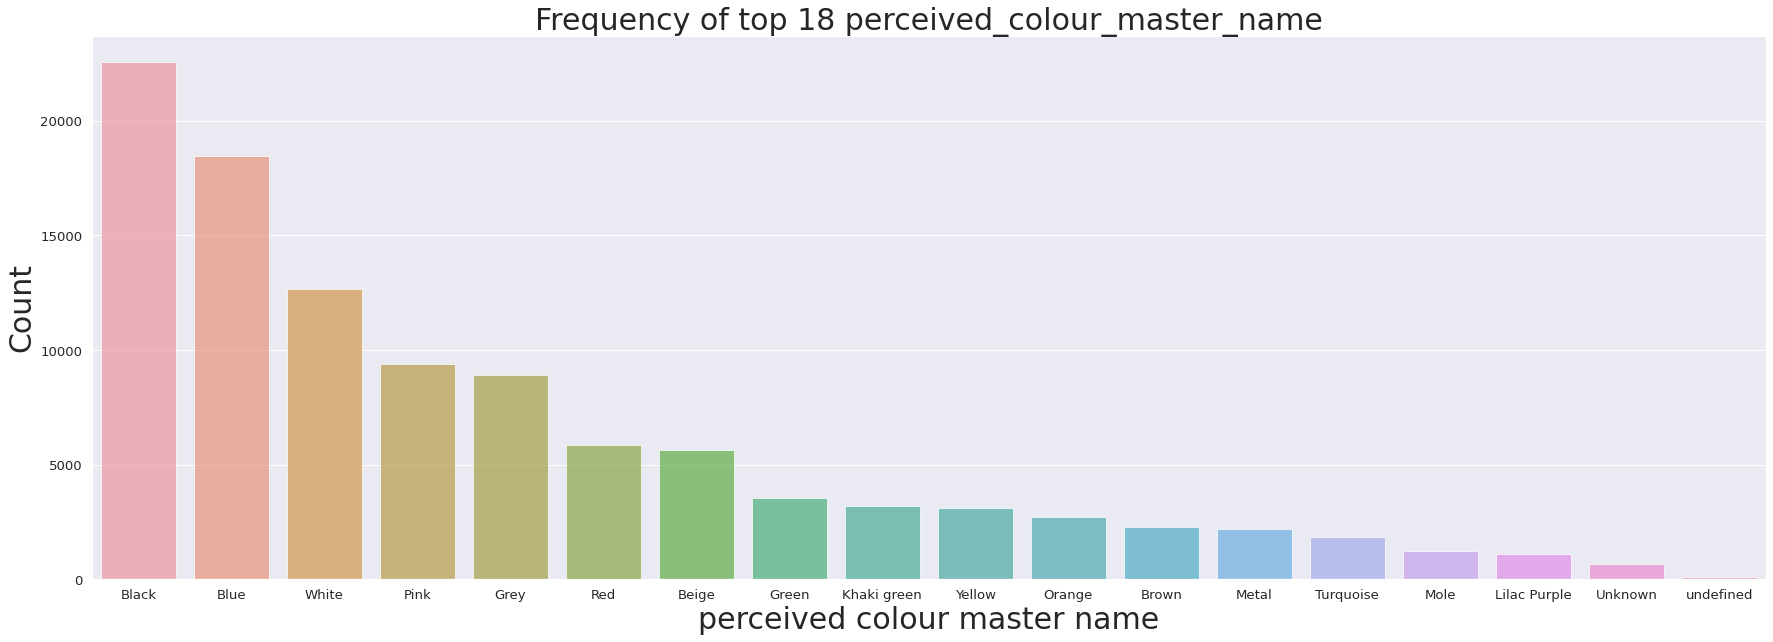

In [88]:
plot_bar_chart(articles, 'perceived_colour_master_name', 18)

In [89]:
articles['garment_group_name'].value_counts()

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

We then have the following peices of meta data along with their codes:
- `department_name` e.g 'Kids Girl Swimwear'
- `index_name` e.g 'Children Accessories, Swimwear'
- `index_group_name` e.g 'Baby/Children'
- `section_name` 'Baby Essentials & Complements'
- `garment_group_name` e.g. 'Swimwear'

In [90]:
display(articles['department_name'].value_counts().head(10))

Jersey                     4604
Knitwear                   3503
Trouser                    2655
Blouse                     2362
Dress                      2087
Swimwear                   2075
Kids Girl Jersey Fancy     2032
Expressive Lingerie        1921
Young Girl Jersey Fancy    1874
Jersey Fancy               1754
Name: department_name, dtype: int64

In [91]:
display(articles['index_name'].value_counts().head(10))

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

In [92]:
display(articles['index_group_name'].value_counts().head(10))

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [93]:
display(articles['section_name'].value_counts().head(10))

Womens Everyday Collection       7295
Divided Collection               7124
Baby Essentials & Complements    4932
Kids Girl                        4469
Young Girl                       3899
Womens Lingerie                  3598
Girls Underwear & Basics         3490
Womens Tailoring                 3376
Kids Boy                         3328
Womens Small accessories         3270
Name: section_name, dtype: int64

In [94]:
display(articles['garment_group_name'].value_counts().head(10))

Jersey Fancy         21445
Accessories          11519
Jersey Basic          8126
Knitwear              7490
Under-, Nightwear     7441
Trousers              6727
Blouses               5838
Shoes                 5145
Dresses Ladies        4874
Outdoor               4501
Name: garment_group_name, dtype: int64

In [95]:
print('Each articles has a detailed description:\n')
for i, (index, row) in enumerate(articles.sample(5).iterrows()):
    description = row['detail_desc']
    print(f'{i+1}. {description} \n')

Each articles has a detailed description:

1. Warm-lined boots in suede with a concealed zip at the back. Faux fur linings and insoles and rubber soles. 

2. Sleeveless playsuit in a soft viscose weave with narrow, adjustable shoulder straps and a flounce at the top. Elasticated seam at the waist, side pockets and wide legs. 

3. Ankle-length trousers in stretch denim with a high waist, zip fly and button and slim legs with side stripes. 

4. Pyjama bottoms in a cotton weave with an elasticated drawstring waist and side pockets. 

5. Chelsea boots with elastic gores in the sides and a loop at the back. Fabric linings and insoles. Heel 2.5 cm. 



## Customers Dataset <a id='tag_data'></a>

In [96]:
customers = pd.read_csv('/content/drive/MyDrive/Project_Data/customers.csv')
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...



<table align="left">
    <tr>
        <td width="15%">
            <img src="pexels-godisable-jacob-896293.jpg">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis <br></b>
                </font>
            </div>
        </td>
    </tr>
</table> <a id='eda_tag'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dimensions, Data Types, Summary Statistics  for Customers Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dd_tag'></a>


In [97]:
customers.shape

(1371980, 7)

##### There are 1371980 rows in the customers dataset 

In [98]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [99]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [100]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [101]:
customers.describe(include = np.object)

,customer_id,club_member_status,fashion_news_frequency,postal_code
count,1371980,1365918,1355971,1371980
unique,1371980,3,4,352899
top,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq,1,1272491,877711,120303


In [102]:
num_customers = len(customers)
num_customer_id = len(customers['customer_id'].unique())
print(f'We have {num_customers} rows and {num_customer_id} unique customer_ids')

We have 1371980 rows and 1371980 unique customer_ids


In [103]:
customers['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [104]:
customers['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

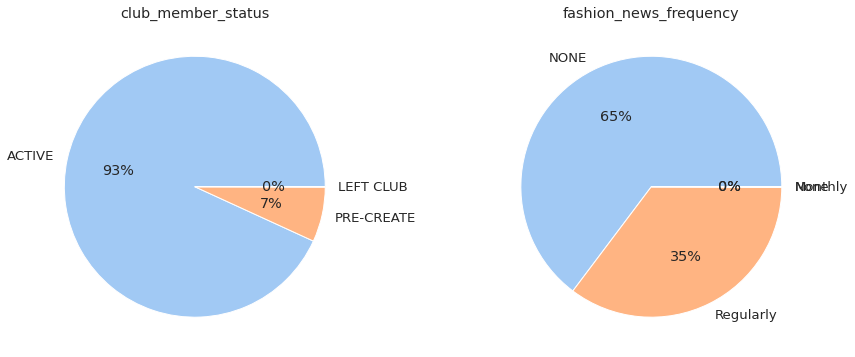

In [105]:
colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(1,2, figsize=(15, 6))
for i, feature in enumerate(['club_member_status', 'fashion_news_frequency']):
    fashion_news = customers[feature].value_counts()
    data = fashion_news.to_list()
    labels = fashion_news.index.to_list()
    ax[i].pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    ax[i].set_title(feature)
fig.show()

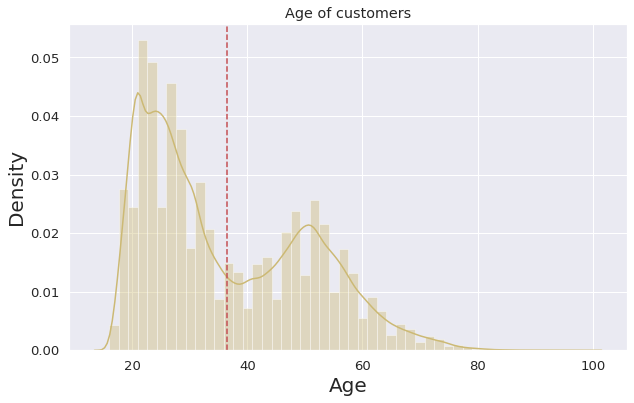

In [106]:
plt.figure(figsize=(10,6))
p = sns.distplot(customers['age'], color="y")
p.set_xlabel("Age", fontsize = 20)
p.set_ylabel("Density", fontsize = 20)
p.set_title("Age of customers")
p.axvline(customers['age'].mean(), color='r', linestyle='--', label="Mean")
plt.show()

## Transaction Dataset <a id='ua_data'></a>

In [107]:
transaction = pd.read_csv('/content/drive/MyDrive/Project_Data/transactions_train.csv')
transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2



<table align="left">
    <tr>
        <td width="15%">
            <img src="pexels-edgars-kisuro-1488463.jpg">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='eda_ua'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dimensions, Data Types, Summary Statistics  for Transaction Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dd_ua'></a>


In [108]:
transaction.shape

(31788324, 5)

##### The dataframe Transactions has 31788324 rows

In [109]:
transaction.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [110]:
transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [111]:
transaction.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [112]:
transaction.describe(include='object')

,t_dat,customer_id
count,31788324,31788324
unique,734,1362281
top,2019-09-28,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...
freq,198622,1895


The Transactions dataframe has more than 31 million rows: For analysis purpose we drop some columns and keep only "customer_id", "article_id", "price".

In [113]:
df_transaction = transaction[["customer_id", "article_id", "price"]]
df_transaction.head()

,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932


In [114]:
articles_sold_qty = df_transaction["article_id"].value_counts()
articles_sold_qty

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

Then we create a dataframe based on this pandas series: this is necessary since later this dataframe will be joined with the "article" dataframe by the article_id column, in order to get informations on the products.

In [115]:
articles_sold_qty=articles_sold_qty.reset_index()
articles_sold_qty.rename(columns = {"article_id":"sold_qty","index":"article_id"}, inplace=True)
articles_sold_qty.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


Then we can get some summary statistics about the sold quantities by calling the describe method on the "sold_qty" column:

In [116]:
articles_sold_qty["sold_qty"].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sold_qty, dtype: float64

Summary statistics on the sold quantities:

there are 105000 different articles in the transactions.
There are items which have been sold only once
25% of sold products, have been sold 14 or less times
50% were sold 65 or less times
75% were sold 286 or less times,
The most sold item have been sold 50287 times.


We can expect a very skewed distribution of this variable, which can be checked by plotting the variable:

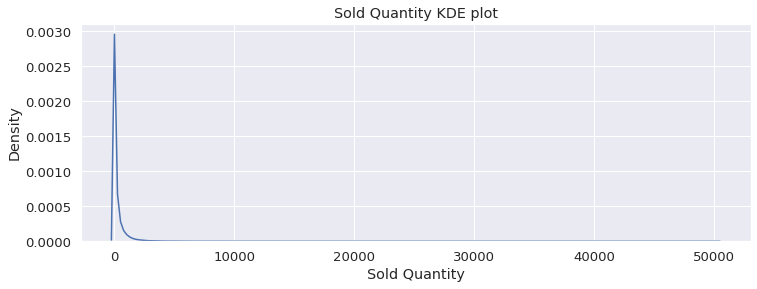

In [117]:
plt.figure(figsize=(12,4))
plt.title("Sold Quantity KDE plot")
sns.kdeplot(articles_sold_qty["sold_qty"])
plt.xlabel("Sold Quantity")
plt.show()

This distribution is heavily right skewed.

In [118]:
# High quantiles of the distribution

articles_sold_qty["sold_qty"].quantile([0.90,0.95,0.99,0.999])

0.900     793.000
0.950    1318.000
0.990    3185.080
0.999    9282.534
Name: sold_qty, dtype: float64

The quantile analysis can give us the following insights:

90% of the articles have been sold 793 or less times
95% of the articles have been sold 1318 or less times
99% of the articles have been sold 3185 or less times

This shows that there is a very small minority of items that sold more than 10k times (just the 0.001%), highlighting the skewness nature of the distribution.

In [119]:
#  TOP 100 articles in terms of sold quantity

top_100_sold = articles_sold_qty.iloc[:100]
top_100_sold.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


Then we join this dataframe with the articles dataframe (df_articles) by the "article_id" column in order to get more details about each article.

In [120]:
top_100_details = sqldf("""SELECT *
        FROM top_100_sold t
        INNER JOIN df_articles a
        on t.article_id = a.article_id
    """)
top_100_details.head(1)

,article_id,sold_qty,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,50287,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided


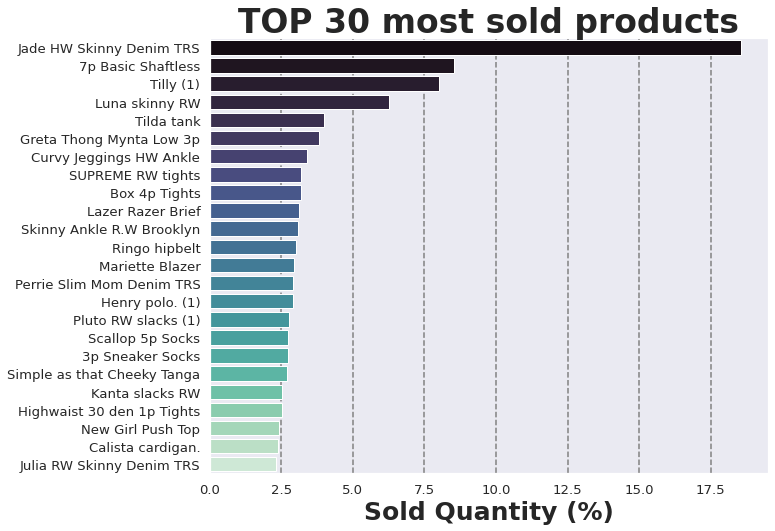

In [121]:
plt.figure(figsize=(10,8))
plt.title("TOP 30 most sold products", fontsize=33, fontweight="bold")
no=30
g = sns.barplot(y="prod_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("prod_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            palette="mako", ci=False)
plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

The trousers "Jade HW Skinny Denim TRS " is responsible for almost 19% of all sold products.
The TOP 4 of most sold items, is responsible for almost 40% of the TOP 100 sold products.

For what concerns other product characteristics (besides the product name), we can obtain very effective plots even if we consider 100 products:

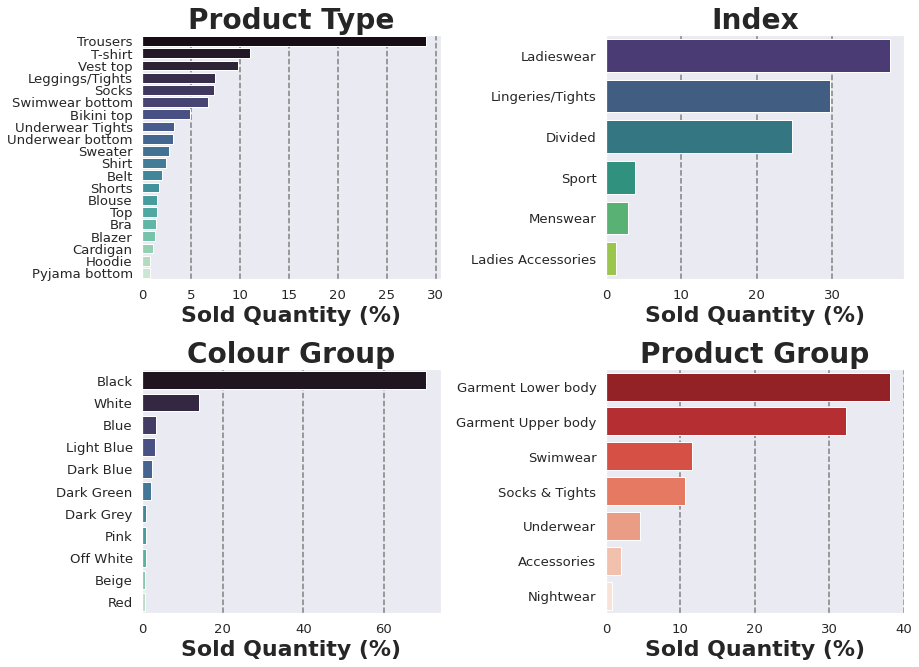

In [122]:
fig, ax = plt.subplots(2,2, figsize=(13,9.5))
#plt.suptitle("TOP 100 most sold products characteristics", fontweight="bold",fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="mako", ci=False)

ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,0].set_title("Product Type",fontweight="bold",fontsize=28)
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="index_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,1].set_title("Index",fontweight="bold",fontsize=28)
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,0].set_title("Colour Group",fontweight="bold",fontsize=28)
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,1].set_title("Product Group",fontweight="bold",fontsize=28)
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 

Among the TOP 100 of solds products:

Almost 30% of sold products are trousers
38% is Ladieswear
30% is Lingeries/Tights
Over 70% are black colored
Almost 40% are related to lower body

As we observed in the previous analysis, there are items that sold only once. We will investigate about these products.

In [123]:
#  Are there articles that have been sold only once?

articles_sold_qty["sold_qty"].where(lambda x: x==1).dropna() #top 15% products

100056    1.0
100057    1.0
100058    1.0
100059    1.0
100060    1.0
         ... 
104542    1.0
104543    1.0
104544    1.0
104545    1.0
104546    1.0
Name: sold_qty, Length: 4491, dtype: float64

Almost 5000 different items have been sold just once.
Since in the "Transactions" dataframe there are around 100000 different items, this means that among the transactions, almost 5% of the products have only been sold once.

Then we can extract these items from the "articles_sold_qty" dataframe by taking the last 4491 values. ( There are 4491 items that sold once)

In [124]:
worst_articles_sold = articles_sold_qty.tail(4491)

In [125]:
#  joining this newly defined dataframe "worst_articles_sold" to the articles dataframe df_articles to get the articles characterisics

worst_details = sqldf("""SELECT *
        FROM worst_articles_sold t
        INNER JOIN df_articles a
        on t.article_id = a.article_id
    """)

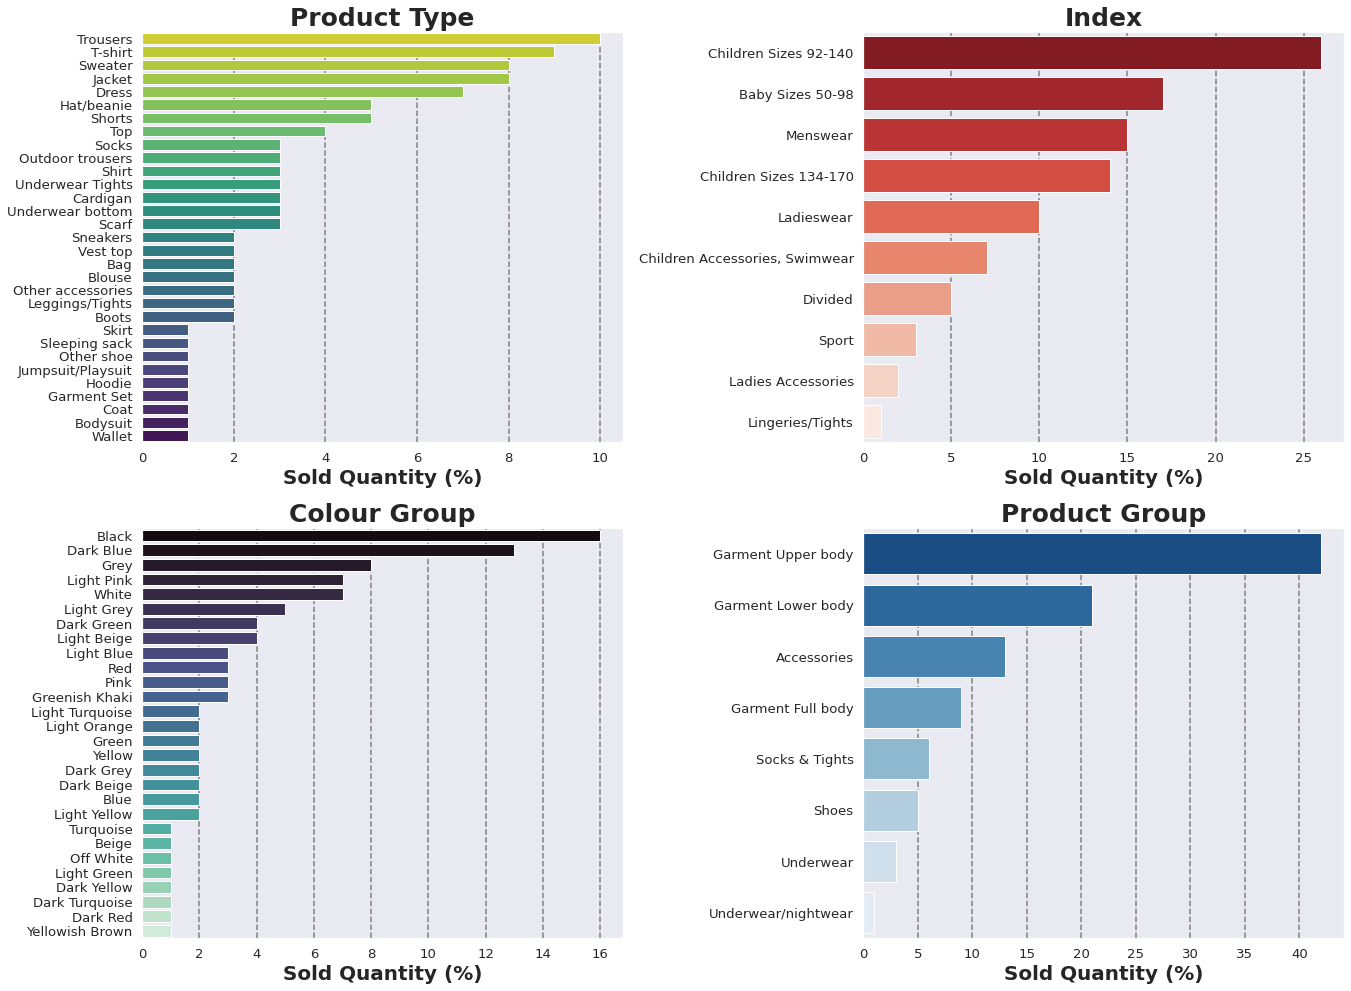

In [126]:
fig, ax = plt.subplots(2,2, figsize=(19,14))
#plt.suptitle("Characteristic of products sold only once", size=38, fontweight="bold")

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="viridis_r", ci=False)

ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,0].set_title("Product Type", size=25, fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="index_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="Reds_r", ci=False)

ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,1].set_title("Index", size=25, fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)

ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,0].set_title("Colour Group", size=25, fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Blues_r", ci=False)

ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,1].set_title("Product Group", size=25, fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

fig.tight_layout()

plt.show() 

We can see that almost 60% of only sold once items are for children.

In [127]:
#  TOP 100 articles that generated most earnings for the company
#  We will now create a new dataframe df_prices which will inlude the earnings generated by each product.

df_transaction_prices = df_transaction[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)

df_transaction_prices.rename(columns={"price":"earning"}, inplace=True)
df_transaction_prices = df_transaction_prices.reset_index()

df_transaction_prices.head()

,article_id,earning
0,706016001,1631.732102
1,706016002,1136.321085
2,568601006,939.268593
3,448509014,781.478390
4,706016003,692.195915


We can see that the most earnings generated by a product is 1631.

In [128]:
print("Number of different sold articles:",len(df_transaction_prices["earning"]))
print("Total Earnings:",df_transaction_prices["earning"].sum())

Number of different sold articles: 104547
Total Earnings: 884645.974050846


In [129]:
for i in [10,50,100,200,300,400,1000]:
    print("The TOP {} of products that generate most earnings, account for the {:.2f} % of total earnings".format(
        i, df_transaction_prices["earning"].iloc[:i].sum() / 
        df_transaction_prices["earning"].iloc[:].sum() * 100) ) 

The TOP 10 of products that generate most earnings, account for the 0.94 % of total earnings
The TOP 50 of products that generate most earnings, account for the 2.74 % of total earnings
The TOP 100 of products that generate most earnings, account for the 4.36 % of total earnings
The TOP 200 of products that generate most earnings, account for the 6.75 % of total earnings
The TOP 300 of products that generate most earnings, account for the 8.60 % of total earnings
The TOP 400 of products that generate most earnings, account for the 10.20 % of total earnings
The TOP 1000 of products that generate most earnings, account for the 17.50 % of total earnings


The TOP 100 of over 100000 products, generates around 5% of the total earnings. It can be interesting to check these products names and characteristics.

In [130]:
#  create a new dataframe top_100_prices, where we include only the TOP 100 articles from the df_prices dataframe

top_100_transaction_prices=df_transaction_prices.iloc[:100]

top_100_price_details = sqldf("""SELECT *
        FROM top_100_transaction_prices t
        INNER JOIN df_articles a
        on t.article_id = a.article_id""")

top_100_price_details.head()

,article_id,earning,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,1631.732102,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,1136.321085,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,568601006,939.268593,568601006,Mariette Blazer,Blazer,Garment Upper body,Black,Ladieswear
3,448509014,781.478390,448509014,Perrie Slim Mom Denim TRS,Trousers,Garment Lower body,Blue,Divided
4,706016003,692.195915,706016003,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Dark Blue,Divided


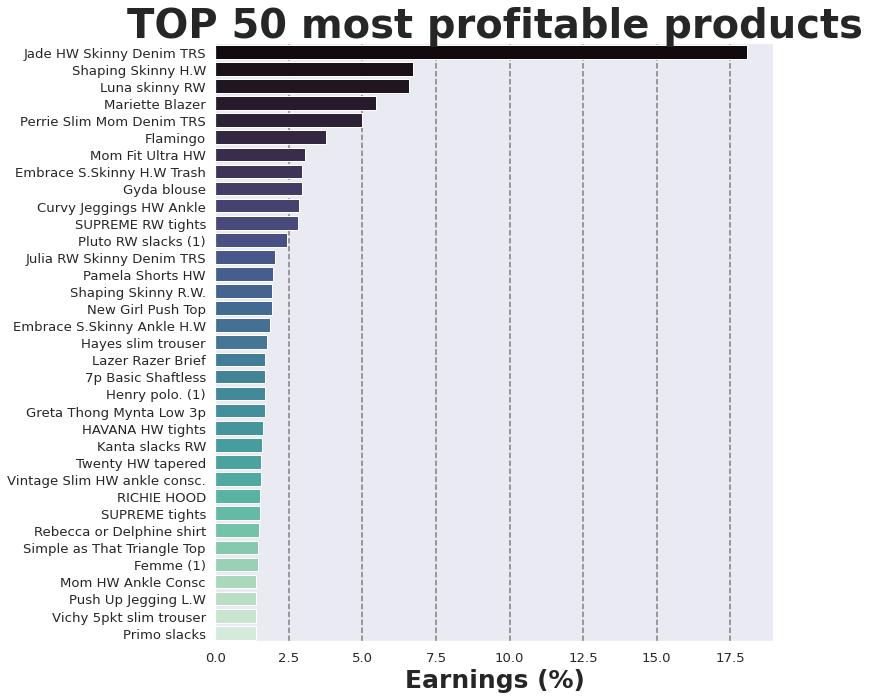

In [131]:
plt.figure(figsize=(10,11))
plt.title("TOP 50 most profitable products", size=40, fontweight="bold")
no=50
g = sns.barplot(y="prod_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("prod_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)

plt.xlabel("Earnings (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

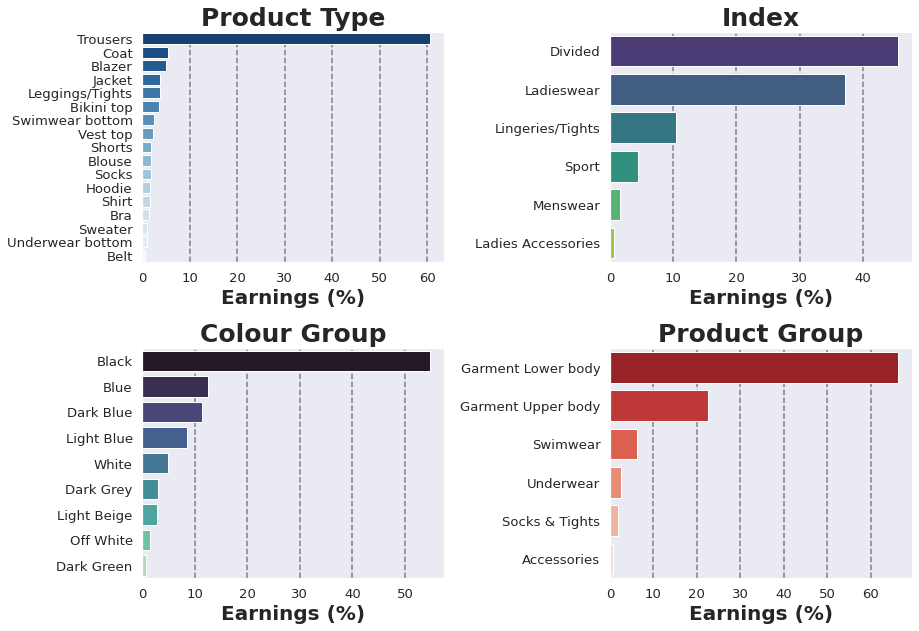

In [132]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
#plt.suptitle("TOP 100 most profitable products characteristics", fontweight="bold", fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)

ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="index_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)

ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="colour_group_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)

ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)

ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 

Insights:

- Over 60% of the TOP 100 products in terms of earnings are generated by selling trousers
- Around 50% of these products are divided (a H&M teenage collection)
- 37% of the products are from the Ladieswear line
- 55% of the products are black
- 66.2% of the products are related to lower body


NOTE: It is also important to notice that the TOP 100 most profitable products list do not exactly match the TOP 100 most sold products one, since lots of products that sells a lot in quantity are cheap, and so generate less earnings.

In [133]:
# articles that generated lower earnings for the company

worst_100_prices=df_transaction_prices.iloc[-100:]

worst_100_price_details = sqldf("""SELECT *
        FROM worst_100_prices t
        INNER JOIN df_articles a
        on t.article_id = a.article_id""")

worst_100_price_details.head()

,article_id,earning,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,555293002,0.002136,555293002,Elin thin hair elastic,Hair string,Accessories,Light Pink,Divided
1,502262002,0.002119,502262002,Kelly mittens,Gloves,Accessories,Light Grey,Baby Sizes 50-98
2,585716001,0.002034,585716001,Festival dress,Dress,Garment Full body,Light Orange,Children Sizes 134-170
3,807241091,0.001864,807241091,1p Fun Socks,Socks,Socks & Tights,Light Grey,Lingeries/Tights
4,551413003,0.001695,551413003,DANTE set,Garment Set,Garment Full body,Light Blue,Baby Sizes 50-98


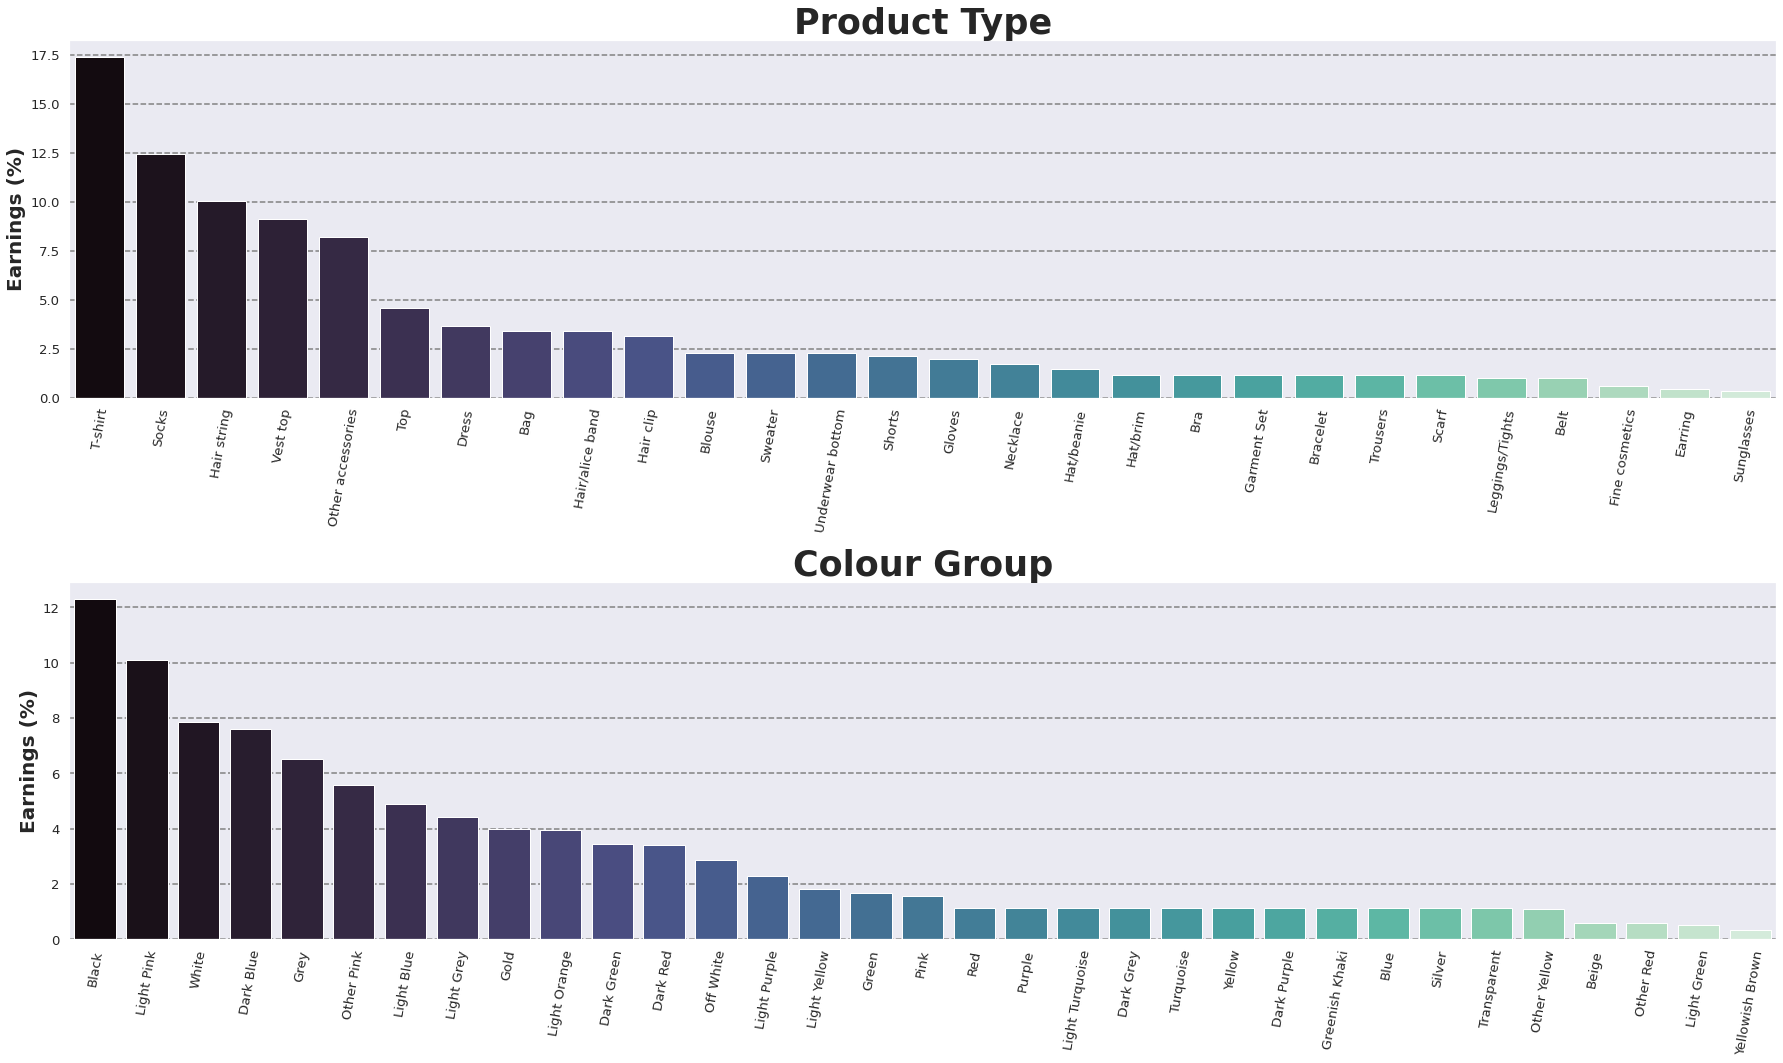

In [134]:
fig, ax = plt.subplots(2,1, figsize=(25,15))
#plt.suptitle("FLOP 100 Worst profitable products characteristics (1)", fontsize=40 ,fontweight="bold")

no=100

g = sns.barplot(x="product_type_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0],palette="mako", ci=False)

ax[0].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax[0].set_xlabel("")
ax[0].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[0].set_title("Product Type", size=35,fontweight="bold")

g = sns.barplot(x="colour_group_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1],palette="mako", ci=False)

ax[1].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_xlabel("")
ax[1].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[1].set_title("Colour Group", size=35,fontweight="bold")
ax[1].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)


fig.tight_layout()

plt.show() 

Insights:

- 17.4% of them are t shirts
- 12.5% are socks
- There are quite a lot of accessories like hair bands, clips etc..

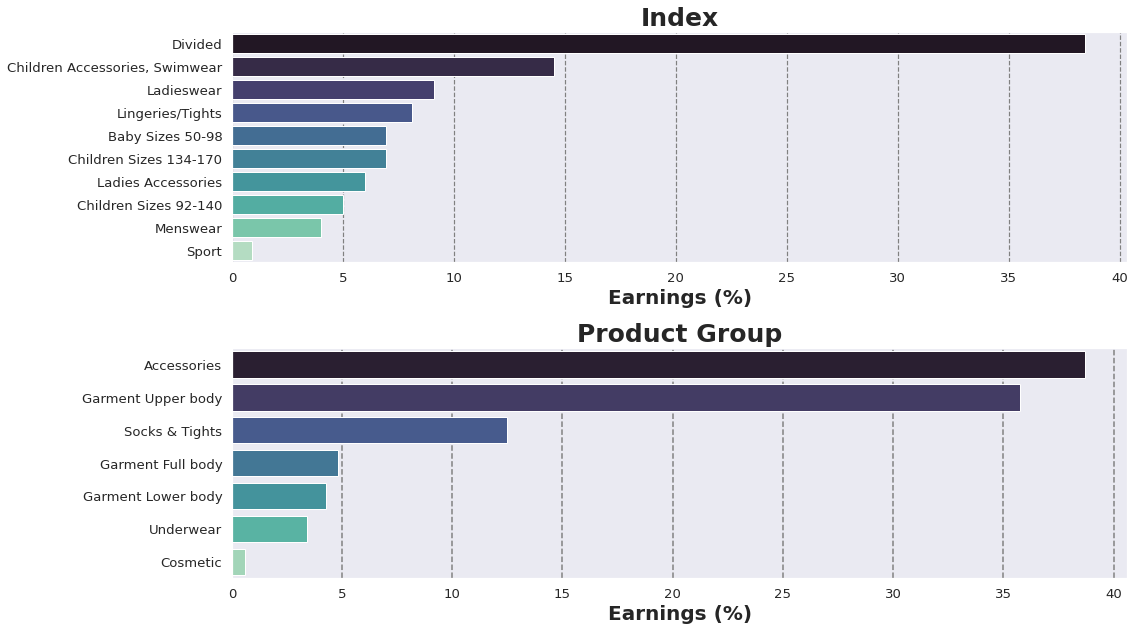

In [135]:
fig, ax = plt.subplots(2,1, figsize=(16,9))
#plt.suptitle("FLOP 100 Worst profitable products characteristics (2)", fontsize=33 ,fontweight="bold")

no=100

g = sns.barplot(y="index_name", x="earning(%)", data=worst_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0],palette="mako", ci=False)

ax[0].set_ylabel("")
ax[0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_title("Index",size=25,fontweight="bold")
ax[0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.2)
             
g = sns.barplot(y="product_group_name", x="earning(%)", data=worst_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1],palette="mako", ci=False)

ax[1].set_ylabel("")
ax[1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_title("Product Group", size=25,fontweight="bold")
ax[1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
             
plt.tight_layout()
             
plt.show()

Insights:

- 38.7% of these only sonce once products are accessories
- Around 35% of these products are for children of babies

<table align="left">
    <tr>
        <td width="20%">
            <img src="pexels-mentatdgt-1485781.jpg">
        </td>
        <td>
            <div align="center", style="font-size:300%">
                <font color="#21618C">
                    <b>Baseline Recommendation<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='rec'></a>

Predictions are evaluated according to the Mean Average Precision:

## $\frac{1}{U} \sum_{u=1}^{U}  \sum_{k=1}^{min(n,12)} P(k) \times rel(k)$

where 𝑈 is the number of customers, 𝑃(𝑘) is the precision at cutoff 𝑘, 𝑛 is the number predictions per image, and 𝑟𝑒𝑙(𝑘) is an indicator function equaling 1 if the item at rank 𝑘 is a relevant (correct) label, zero otherwise.

Notes:

You will be making purchase predictions for all `customer_id` values provided, regardless of whether these customers made purchases in the training data.
Customer that did not make any purchase during test period are excluded from the scoring.
There is never a penalty for using the full 12 predictions for a customer that ordered fewer than 12 items; thus, it's advantageous to make 12 predictions for each customer.

In [136]:
# Due to low memory
%reset -f

In [140]:
DATA_PATH = Path('/content/drive/MyDrive/Project_Data')

def add_value(dict_obj, key, value):
    if key not in dict_obj:
        dict_obj[key] = value
    elif isinstance(dict_obj[key], list):
        dict_obj[key].append(value)
    else:
        dict_obj[key] = [dict_obj[key], value]
        
# Messy code to get prediction into correct format ..
def format_prediction(pred, old_pred):
    pred = [str(i) for i in pred[:12]]
    old_list = old_pred.split()
    del old_list[-len(pred):]
    old_list = old_list + pred
    pred =' '.join(old_list)
    return pred

The following Baseline suggests articles to the customer which other customers with similar purchase history have bought. It also uses the most-common-benchmark to fill in some gaps..

In [141]:
# Load in the data
transactions_train = pd.read_csv(DATA_PATH/'transactions_train.csv',
                                 dtype={'article_id': str},parse_dates=['t_dat'],infer_datetime_format=True
                                ,usecols=['t_dat', 'customer_id', 'article_id'])
# transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
# transactions = transactions[transactions['t_dat'] > pd.to_datetime('2020-06-01')]
# transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
t_cut = pd.to_datetime('2020-02-01') ## '2020-06-01'
transactions_train = transactions_train.loc[(transactions_train['t_dat'] > t_cut) | (transactions_train['t_dat'].dt.month==9)]

In [142]:
%%time
# Select required columns
transactions_train = transactions_train[['customer_id', 'article_id']]

# Groupby customer ID and collect all the articles purchased into a list
transactions_train = transactions_train.groupby('customer_id')['article_id'].apply(list)

# Due to low memory select a subset of transactions -- to be improved ..
transactions_train = transactions_train[:180000] # 150000 - orig , trying more

# Find all pairs of articles which are purchased by the same customer
transactions_train = Counter(chain.from_iterable(combinations(customer, 2) for customer in transactions_train.to_list()))

# Remove pairs of articles which do not occur frequently together
frequent_pairs = {k: v for k, v in transactions_train.items() if v > 5}

# Sort by frequency
sorted_pairs = {k: v for k, v in sorted(frequent_pairs.items(), key=lambda item: item[1], reverse=True)}

CPU times: user 1min 1s, sys: 2.45 s, total: 1min 3s
Wall time: 1min 5s


In [143]:
dict(list(sorted_pairs.items())[0: 5])

{('0610776001', '0610776001'): 1489,
 ('0706016001', '0706016001'): 1773,
 ('0781833004', '0781833004'): 2260,
 ('0841383002', '0841383002'): 1772,
 ('0852521001', '0852521001'): 3256}

We can see that `sorted pairs` is a dictionary containing article pairs and their corresponding co occurence frequency within a single customer purchase history (summed over all customers).

In [144]:
# Generate final pairing dictionary
final_pairs = {}
for k, v in sorted_pairs.items():
    add_value(final_pairs, k[0], k[1])

### generate 12 top myself
* based on:

In [145]:
# top_12_items = df.groupby('article_id')['customer_id'].nunique().sort_values(ascending=False).head(12).index.tolist()
top_12_items =  ['0706016001',
 '0372860001',
 '0706016002',
 '0610776002',
 '0759871002',
 '0372860002',
 '0464297007',
 '0720125001',
 '0673396002',
 '0610776001',
 '0673677002',
 '0706016003']

In [146]:
samp_sub = pd.read_csv('/content/drive/MyDrive/Project_Data/sample_submission.csv')
samp_sub['prediction'] =  ' '.join(top_12_items)

In [147]:
# Convert to dictionary for speed
sub_dict = samp_sub.to_dict('records')

transactions_train = pd.read_csv(DATA_PATH/'transactions_train.csv', dtype={'article_id': str},usecols=['t_dat', 'customer_id', 'article_id'])
transactions_train = transactions_train[['t_dat', 'customer_id', 'article_id']]

# Sort by date
transactions_train['date'] =  pd.to_datetime(transactions_train["t_dat"])
transactions_train = transactions_train.sort_values(by="date")

customer_dict = dict(zip(transactions_train['customer_id'], transactions_train['article_id']))

In [148]:
dict(list(customer_dict.items())[0: 5])

{'000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318': '0794321007',
 'a8c2e2e62e27ccde83cbe03e8281cef5e1df94ed79d4936cb277fc7bb12b0e06': '0529953001',
 'a8c5ba583d218ffe2d822f19eccc65e1bc7b4ef14f7a059c4fae1ac522f35ba7': '0814631004',
 'a8c6ba47f97f7672eca48ce30e05e1143add0ee00f9c819ee3eb9f11040f306e': '0554598009',
 'a8c746a9230ef3a1d535949d6f74c5922a88591b1d4c170ef4305747114d6a67': '0801452003'}

We can see that `customer_dict` is a dictionary with `customer_id` and their most recent purchase `article_id`

In [149]:
preds = []
for i, row in tqdm(enumerate(sub_dict)):
    old_pred = row['prediction']
    customer = row['customer_id']
    try:
        most_recent_article = customer_dict[customer]
        pred = final_pairs[most_recent_article]
        if type(pred)==str:
            preds.append(old_pred[:-10] + str(pred))
            continue
        preds.append(format_prediction(pred, old_pred))
    except:
        preds.append(old_pred)

1371980it [00:10, 129186.94it/s]


In [150]:
samp_sub['prediction'] = preds
samp_sub.to_csv('predictions.csv', index=False)

In [151]:
prediction = pd.read_csv('predictions.csv')
prediction.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0372860001 0706016002 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0372860001 0706016002 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0372860001 0706016002 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0742079001 0754267016 0740519002 0742079003 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0456163085 0791587015 0160442010 0791587001 09...
